<a href="https://colab.research.google.com/github/Nihala-RI/Machine-Learning/blob/main/Iris_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Decision Tree using ENTROPY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
df=pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df[df.duplicated]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(150, 6)

In [ ]:
df.size

900

In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
labelencoder=preprocessing.LabelEncoder()
df['Species']=labelencoder.fit_transform(df['Species'])

In [ ]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
df['Species'].unique()

array([0, 1, 2])

In [ ]:
x=df.iloc[:,0:4]
y=df['Species']

In [ ]:
colnames=list(df.columns)
colnames

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

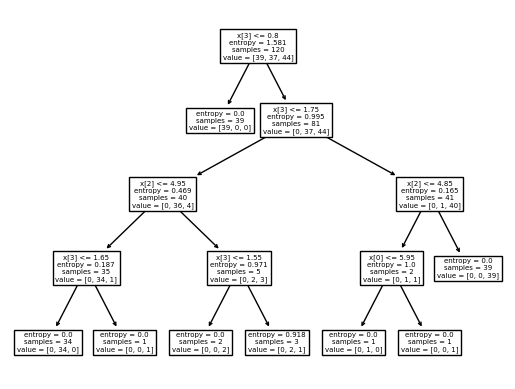

In [ ]:
tree.plot_tree(model);

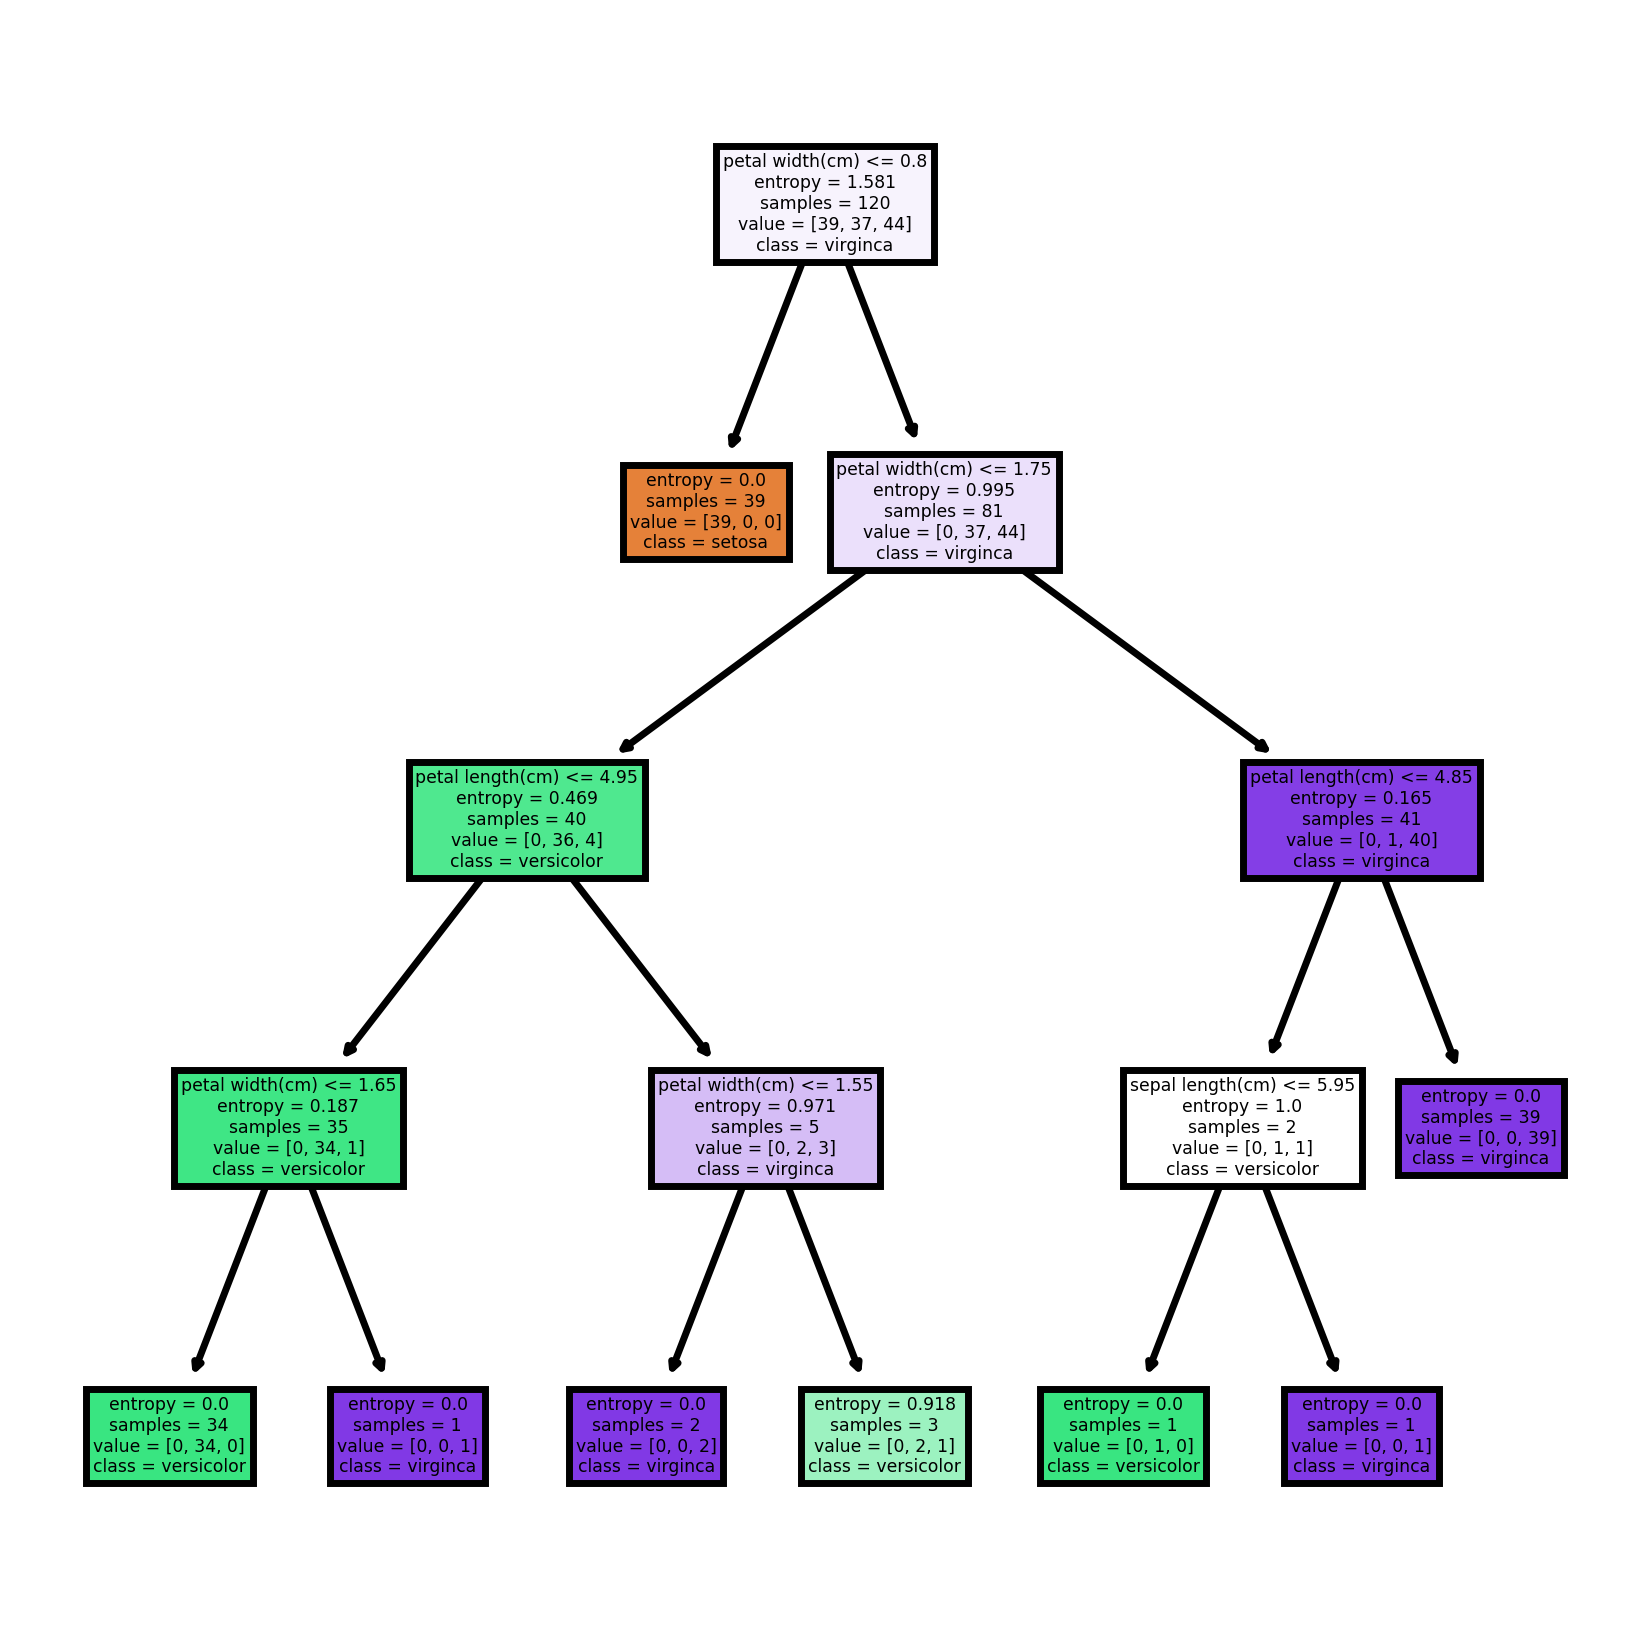

In [ ]:
fn=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
cn=['setosa','versicolor','virginca']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=500)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [ ]:
preds=model.predict(x_test)
preds

array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 2])

In [ ]:
pd.Series(preds).value_counts()

0    11
1    11
2     8
dtype: int64

In [ ]:
y_test.value_counts()

0    11
1    10
2     9
Name: Species, dtype: int64

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,11,0,0
1,0,10,0
2,0,1,8


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.9666666666666667

In [ ]:
newdata=pd.DataFrame({'SepalLengthCm':5.8,'SepalWidthCm':3.7,'PetalLengthCm':1.9,'PetalWidthCm':0.4},index=[1])

In [ ]:
model.predict(newdata)

array([0])

### **CART(CLASSIFICATION & REGRESSION TREE)**

In [ ]:
model.gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

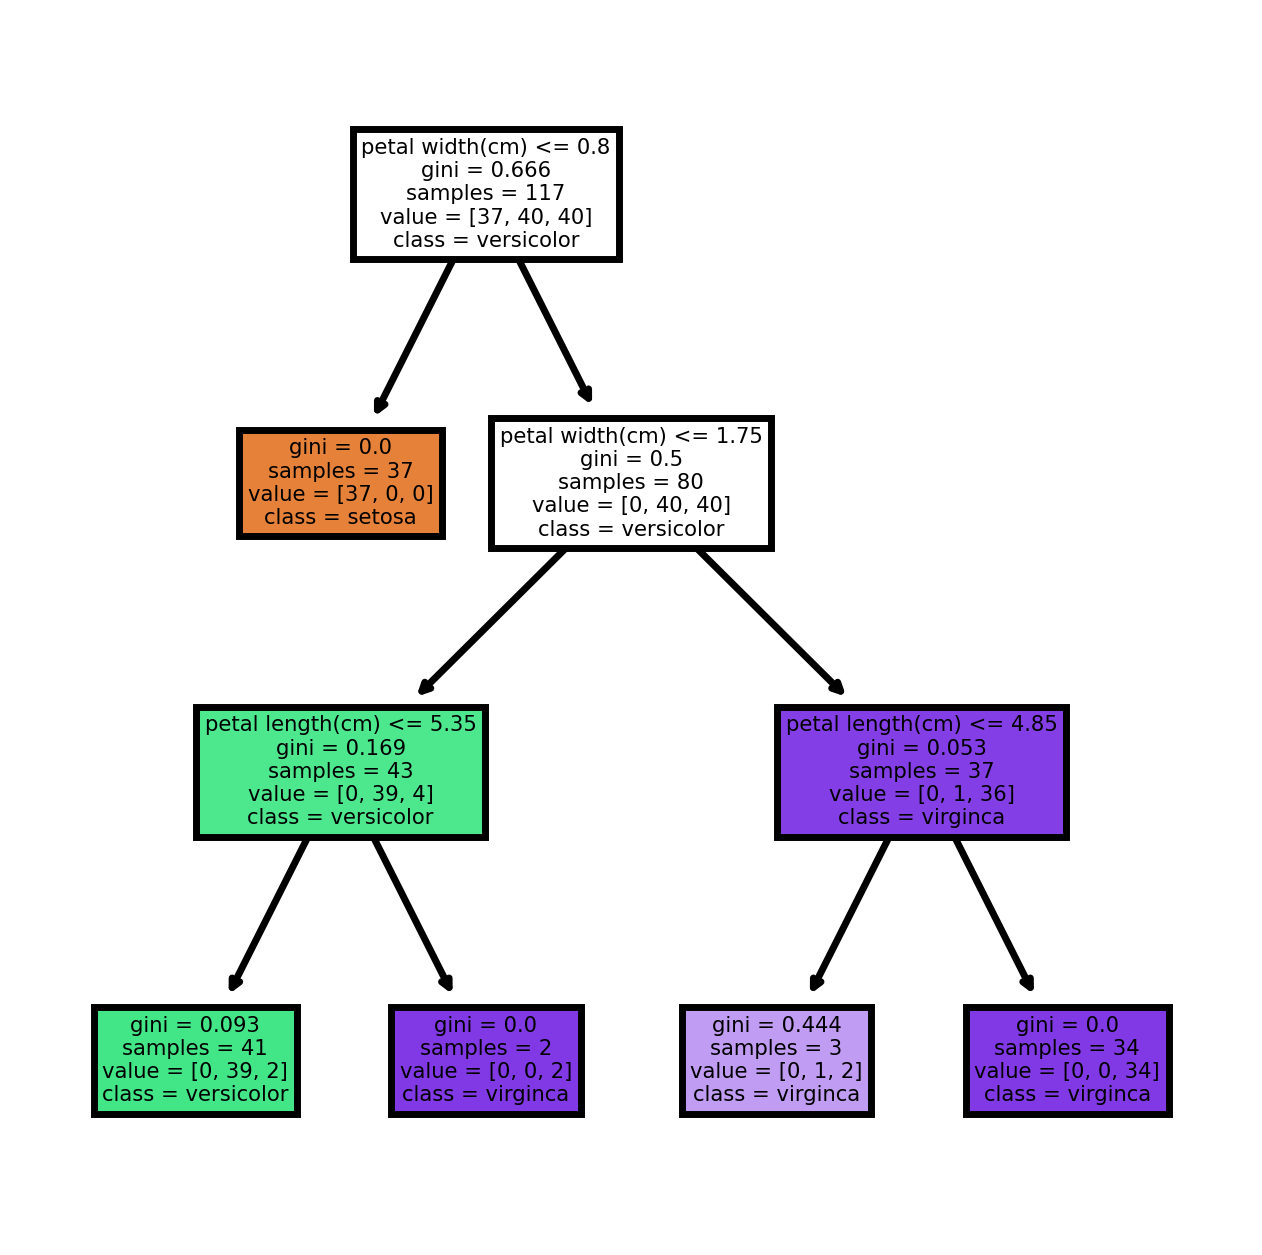

In [ ]:
fn=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
cn=['setosa','versicolor','virginca']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=500)
tree.plot_tree(model.gini,feature_names=fn,class_names=cn,filled=True);

In [ ]:
pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

0.9666666666666667